## Surface temperature - one model

time mean \
Annual \
Seasonal \
Monthly
<br />

In [3]:
import xarray as xr
import numpy as np
import skimage.measure as skm
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

from cmip5_metrics.funcs.vars.myFuncs import *
from cmip5_metrics.funcs.vars.myPlots import *
# from cmip5_metrics.funcs.vars.tasVars import *
from cmip5_metrics.funcs.tasFuncs import *
from cmip5_metrics.funcs.aggFuncs import *

import timeit

switch = {
    'local_files': True, 
    'nci_files': False, 
}

In [4]:
models = [
    # 'IPSL-CM5A-MR', # 1
    #'GFDL-CM3',      # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]


experiments = [
    # 'historical',
    'rcp85'
    ]
experiment = experiments[0]       


if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + 'ds'
    fileName = model + '_tas_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    tas = ds.tas

if switch['nci_files']:
    tas = get_tas(model, experiment)

In [5]:
tas

<xarray.DataArray 'tas' (time: 360, lat: 22, lon: 128)>
[1013760 values with dtype=float32]
Coordinates:
  * time     (time) object 2070-01-16 12:00:00 ... 2099-12-16 12:00:00
    height   float64 ...
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    deg (C)

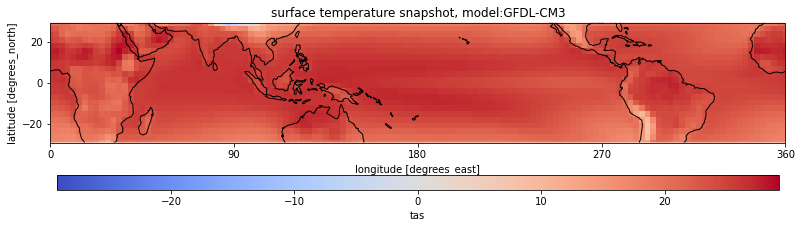

In [4]:
plot_snapshot(tas.mean(dim='time'), 'coolwarm', 'surface temperature', model)

In [5]:
aWeights = np.cos(np.deg2rad(tas.lat))

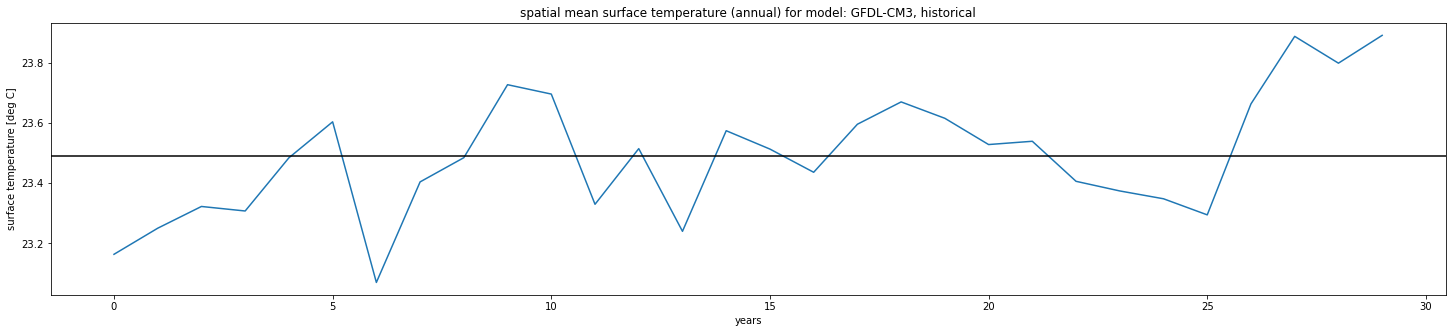

In [6]:
plt.figure(figsize= (25,5))
plt.plot(tas.weighted(aWeights).mean(dim=('lat','lon')).resample(time='Y').mean(dim='time'))
plt.title('spatial mean surface temperature (annual) for model: ' + model + ', ' + experiment)
plt.ylabel('surface temperature [deg C]')
plt.xlabel('years')
plt.axhline(y=tas.weighted(aWeights).mean(dim=('time','lat','lon')), color='k')

In [7]:
def to_monthly(da):
    year = da.time.dt.year
    month = da.time.dt.month

    # assign new coords
    da = da.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return da.set_index(time=("year", "month")).unstack("time")

In [8]:
tas_season = tas.weighted(aWeights).mean(dim=('lat', 'lon')).resample(time='QS-DEC').mean(dim="time")
tas_season = to_monthly(tas_season)
tas_season = tas_season.rename({'month':'season'})
tas_season = tas_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

Text(0.5, 1.0, 'surface temperature by season, model: GFDL-CM3, historical')

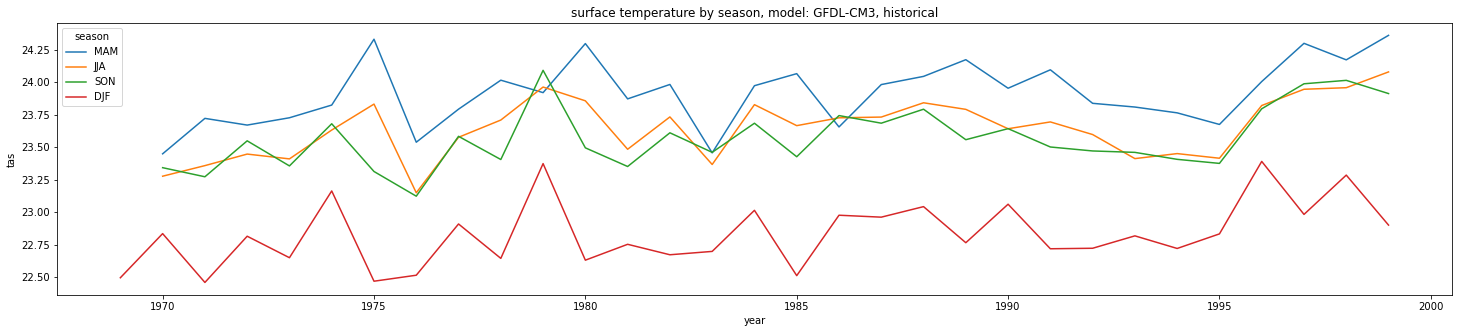

In [9]:
tas_season.plot(x='year', hue='season', figsize=(25,5))
plt.title('surface temperature by season' + ', model: ' + model + ', ' + experiment)

In [10]:
tas_monthly = to_monthly(tas.weighted(aWeights).mean(dim=('lat', 'lon')))
tas_monthly = tas_monthly.assign_coords(month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'])

Text(0.5, 1.0, 'surface temperature (monthly mean), model: GFDL-CM3, historical')

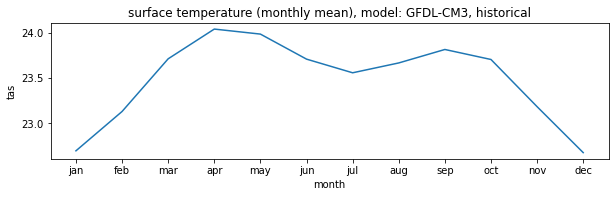

In [11]:
tas_monthly.mean(dim='year').plot(figsize = (10,2.5))
plt.title('surface temperature (monthly mean)' + ', model: ' + model + ', ' + experiment)

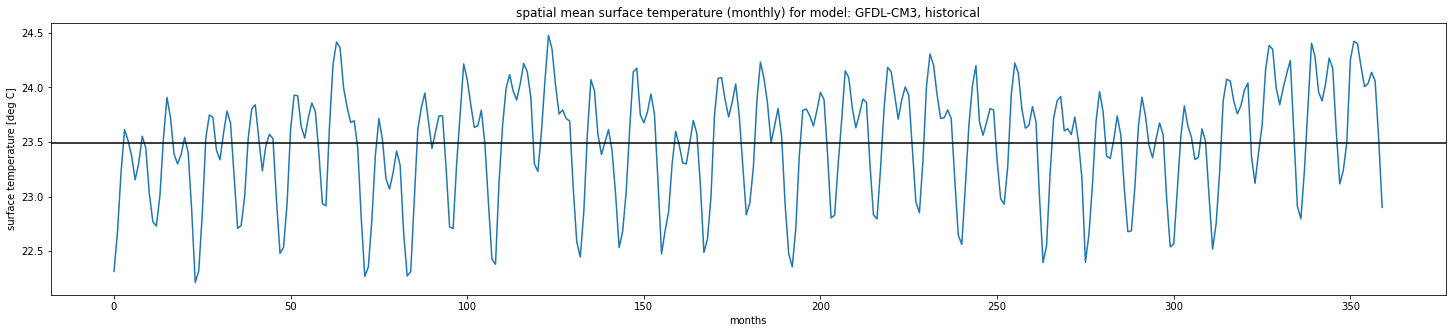

In [12]:
plt.figure(figsize= (25,5))
plt.plot(tas.weighted(aWeights).mean(dim=('lat','lon')))
plt.title('spatial mean surface temperature (monthly) for model: ' + model + ', ' + experiment)
plt.ylabel('surface temperature [deg C]')
plt.xlabel('months')
plt.axhline(y=tas.weighted(aWeights).mean(dim=('time','lat','lon')), color='k')

### extras

In [13]:
# plt.figure(figsize= (25,5))
# plt.plot(tas.isel(time=slice(0,12)).weighted(aWeights).mean(dim=('lat','lon')))
# plt.title('spatial mean surface temperature (monthly) for model: ' + model + ', ' + experiment)
# plt.ylabel('surface temperature [deg C]')
# plt.xlabel('months')
# plt.axhline(y=tas.weighted(aWeights).mean(dim=('time','lat','lon')), color='k')

In [14]:
# tas_tMean = calc_tas_tMean(tas)
# plot_snapshot(tas_tMean['tas_tMean'], 'coolwarm', 'surface temperature', model)

In [15]:
# tas_sMean = calc_tas_sMean(tas)
# plt.figure(figsize= (25,5))
# plt.plot(tas_sMean['tas_sMean'])
# plt.title('spatial mean surface temperature (monthly) for model: ' + model + ', ' + experiment)
# plt.ylabel('surface temperature [deg C]')
# plt.xlabel('months')
# plt.axhline(y=tas.weighted(aWeights).mean(dim=('time','lat','lon')), color='k')